### Boostin Algorithm

- 앙상블은 전통적으로 Voting, Bagging, Boosting, 스태깅으로 나눔
- 보팅과 배깅은 여러개의 분류기가 투표를 통해 예측 결과를 결정하는 방식 
- 보팅과 배깅의 차이점은 보팅은 각각 다른 분류기, 배깅은 같은 분류기를 사용
- 대표적인 배깅 방식이 랜덤 포레스트

<img src ='https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png'>

##### _Image by <a href = 'https://www.geeksforgeeks.org/boosting-in-machine-learning-boosting-and-adaboost/'>Boosting in Machine Learning </a>_


앙상블 학습의 일종으로, 약한 학습기(weak learner)인 여러 개의 모델을 결합하여 강력한 학습기(strong learner)를 만드는 방법입니다. <p>
부스팅 알고리즘은 이전 모델의 오차를 보완하도록 새로운 모델을 순차적으로 훈련시키는 방식으로 동작합니다.

일반적으로 부스팅 알고리즘은 다음과 같은 단계로 진행됩니다

1. 초기화: 첫 번째 모델을 학습시킵니다. 일반적으로 초기 모델은 간단하고 약한 학습기로 선택됩니다. 예를 들어, 결정 트리의 깊이가 얕은 모델이 초기 모델로 사용될 수 있습니다.

2. 반복 훈련: 초기 모델을 사용하여 예측을 수행하고, 예측 결과와 실제 값의 차이에 대한 오차를 계산합니다. 이 오차를 줄이기 위해 다음 모델을 학습시킵니다. 이 때, 이전 모델이 잘못 예측한 샘플에 가중치를 높여 다음 모델이 그 부분을 보완하도록 학습하는 것이 특징입니다.

3. 예측 결합: 반복적으로 학습된 모델들을 결합하여 예측을 수행합니다. 일반적으로 각 모델의 예측 결과에 가중치를 부여하거나 투표(voting) 방식을 사용하여 최종 예측을 만듭니다.

부스팅 알고리즘에는 여러 종류가 있습니다. 대표적인 부스팅 알고리즘으로는 아다부스트(AdaBoost), 그래디언트 부스팅(Gradient Boosting), XGBoost, LightGBM, CatBoost 등이 있습니다. 각 알고리즘은 조금씩 다른 방법을 사용하여 모델을 업데이트하고 오차를 보완합니다

#### bagging vs boosting 

<img src ='https://pluralsight2.imgix.net/guides/81232a78-2e99-4ccc-ba8e-8cd873625fdf_2.jpg'>

##### _Image by <a href = 'https://www.pluralsight.com/guides/ensemble-methods:-bagging-versus-boosting'>Bagging Versus Boosting</a>_


#### Adaboost

부스팅 알고리즘의 일종으로, 이전 모델들이 잘못 분류한 샘플들에 가중치를 부여하여 다음 모델이 이 부분을 보완하도록 하는 방식

<img src ='https://miro.medium.com/v2/resize:fit:828/format:webp/1*qzIPSA-HQlefxxZnPlb-2w.png'>

##### _Image by <a href = 'https://pub.towardsai.net/all-about-adaboost-ba232b5521e9'>All About Adaboost</a>_




In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(url, index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality'] ]

X = wine.drop(['quality','taste'], axis=1)
Y = wine['taste']

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, Y, test_size=0.2, random_state=13)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'color'}>,
        <Axes: title={'center': 'taste'}>, <Axes: >, <Axes: >]],
      dtype=object)

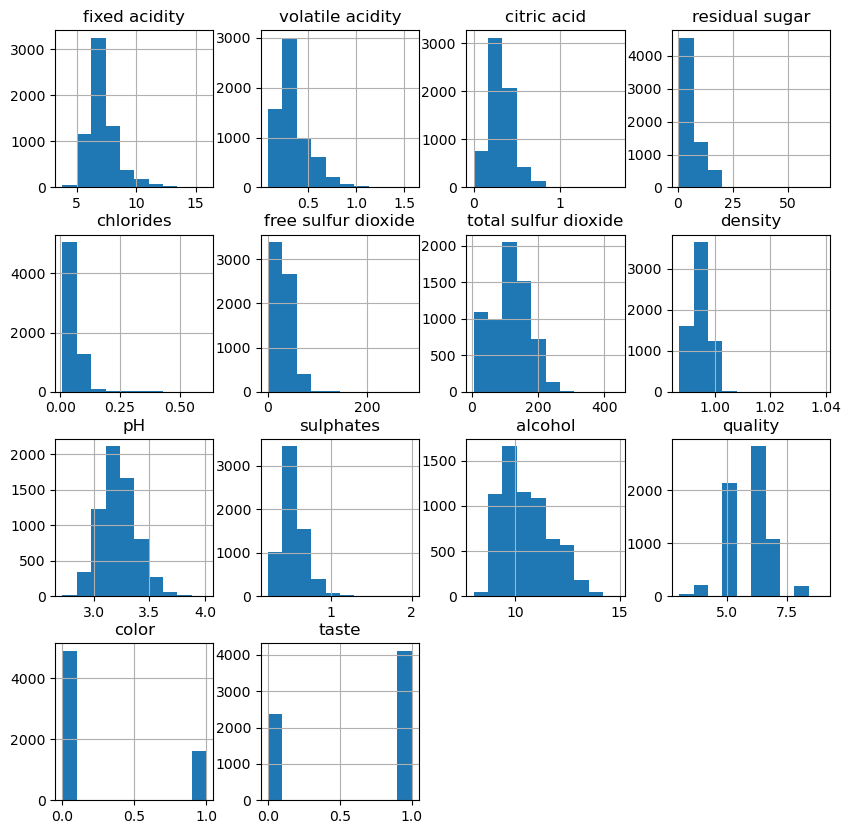

In [12]:
import matplotlib.pyplot as plt

wine.hist(bins=10, figsize=(10,10))

In [13]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'taste'],
      dtype='object')

In [15]:
column_name = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

df_pivot_table = wine.pivot_table(column_name, ['quality'], aggfunc = 'median')
df_pivot_table

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,10.15,0.0550,0.33,0.995900,7.45,17.0,3.245,3.15,0.505,102.5,0.415
4,10.00,0.0505,0.26,0.994995,7.00,15.0,3.220,2.20,0.485,102.0,0.380
5,9.60,0.0530,0.30,0.996100,7.10,27.0,3.190,3.00,0.500,127.0,0.330
6,10.50,0.0460,0.31,0.994700,6.90,29.0,3.210,3.10,0.510,117.0,0.270
7,11.40,0.0390,0.32,0.992400,6.90,30.0,3.220,2.80,0.520,114.0,0.270
8,12.00,0.0370,0.32,0.991890,6.80,34.0,3.230,4.10,0.480,118.0,0.280
9,12.50,0.0310,0.36,0.990300,7.10,28.0,3.280,2.20,0.460,119.0,0.270


In [17]:
corr_matrix = wine.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.067354
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.267046
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.075739
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,-0.032484
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.181908
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.044819
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,-0.047585
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.268876
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,0.018842
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,0.035807


In [18]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
taste                   0.814484
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
color                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

<Axes: xlabel='taste', ylabel='count'>

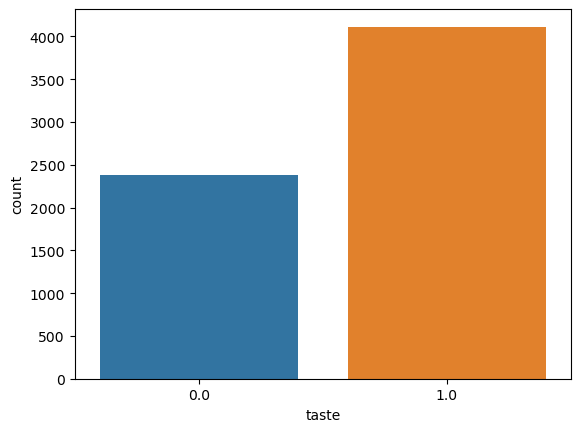

In [22]:
import seaborn as sns

sns.countplot(x=wine['taste'])

### 다양한 모델 한번에 테스트
- AdaBoost
- GradientBoosting
- RandomForest

In [23]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
models = []
models.append( ('AdaBoostClassifier',AdaBoostClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('LogisticRegression', LogisticRegression()) )

models

[('AdaBoostClassifier', AdaBoostClassifier()),
 ('GradientBoostingClassifier', GradientBoostingClassifier()),
 ('RandomForestClassifier', RandomForestClassifier()),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('LogisticRegression', LogisticRegression())]

In [27]:
%%time

from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    print(name, cv_results.mean(), cv_results.std())

AdaBoostClassifier 0.7533103205745169 0.02644765901536818
GradientBoostingClassifier 0.7663959428444511 0.021596556352125432
RandomForestClassifier 0.820850484933738 0.019853362104636972
DecisionTreeClassifier 0.7544721255645221 0.008330881259691163
LogisticRegression 0.74273191678389 0.015548839626296565
CPU times: total: 9.72 s
Wall time: 17.4 s


#### cross_validation

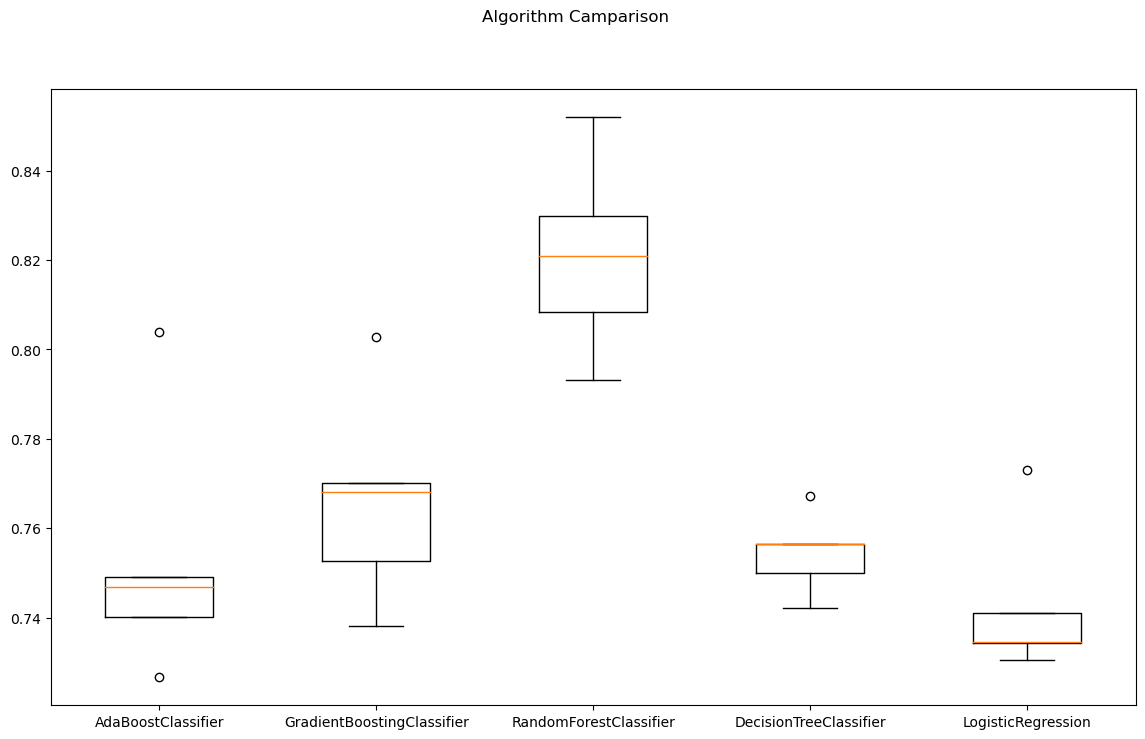

In [31]:
fig = plt.figure(figsize=(14,8))
fig.suptitle('Algorithm Camparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()